In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils_data import x_y_split , data_splitter
from utils_lgbm import lgbm_train_val_test_split_original
from lgbm_data_prep import LgbmDataPrep
from sklearn.pipeline import Pipeline, FeatureUnion
import numpy as np
import pandas as pd
from typing import List

### Split To Original train and test

In [3]:
x,v,t = lgbm_train_val_test_split_original()

### split to X, y 

In [4]:
X, y = x_y_split(x,'anomaly')
X_test, y_test = x_y_split(t,'anomaly')

In [5]:
config = {
    'target_column': 'anomaly',
    'look_back': 10,
    'num_splits': 7,
    'th': 0.5

}

In [6]:
model_pipeline, targets_pipe =  LgbmDataPrep(**config).run()

In [7]:
model_pipeline

Pipeline(steps=[('transformations',
                 FeatureUnion(transformer_list=[('part_0',
                                                 Pipeline(steps=[('drop_changepoint',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint'])),
                                                                 ('smooth',
                                                                  SmoothCurve()),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('df_creator',
                                                                  CreateStatsDataframe()),
                                                                 ('classifier',
                                                                  <lgbm_model.LgbmModel object at 0x13978a050>)])),
                                                ('part_1',
                                                 Pipeline(steps=[('dro...
                                                                 ('classifier',
                                                                  <lgbm_model.LgbmModel object at 0x13978b100>)])),
                                                ('part_6',
                                                 Pipeline(steps=[('drop_changepoint',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint'])),
                                                                 ('smooth',
                                                                  SmoothCurve()),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('df_creator',
                                                                  CreateStatsDataframe()),
                                                                 ('classifier',
                                                                  <lgbm_model.LgbmModel object at 0x13978b8e0>)]))])),
                ('processing_results', AggregateModelScores())])

In [8]:
y = targets_pipe.fit_transform(y)
model_pipeline.fit(X,y)

[LightGBM] [Info] Number of positive: 505, number of negative: 1309
[LightGBM] [Info] Total Bins 6116
[LightGBM] [Info] Number of data points in the train set: 1814, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278390 -> initscore=-0.952460
[LightGBM] [Info] Start training from score -0.952460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 635, number of negative: 1179
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 1814, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350055 -> initscore=-0.618797
[LightGBM] [Info] Start training from score -0.618797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Pipeline(steps=[('transformations',
                 FeatureUnion(transformer_list=[('part_0',
                                                 Pipeline(steps=[('drop_changepoint',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint'])),
                                                                 ('smooth',
                                                                  SmoothCurve()),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('df_creator',
                                                                  CreateStatsDataframe()),
                                                                 ('classifier',
                                                                  <lgbm_model.LgbmModel object at 0x13978a050>)])),
                                                ('part_1',
                                                 Pipeline(steps=[('dro...
                                                                 ('classifier',
                                                                  <lgbm_model.LgbmModel object at 0x13978b100>)])),
                                                ('part_6',
                                                 Pipeline(steps=[('drop_changepoint',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint'])),
                                                                 ('smooth',
                                                                  SmoothCurve()),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('df_creator',
                                                                  CreateStatsDataframe()),
                                                                 ('classifier',
                                                                  <lgbm_model.LgbmModel object at 0x13978b8e0>)]))])),
                ('processing_results', AggregateModelScores())])

In [9]:
res = model_pipeline.transform(X_test)
y_pred = res['avg_prediction'].copy()

X.shape:  (1844, 7)


In [10]:
res

,model_0,model_1,model_2,model_3,model_4,model_5,model_6,avg_prediction,median_prediction,max_prediction
0,0.004335,0.011337,0.005905,0.00318,0.121027,0.004436,0.004971,0.022170,0.005438,0.121027
1,0.004335,0.011325,0.005905,0.00318,0.122861,0.004436,0.004971,0.022430,0.005438,0.122861
2,0.004335,0.004996,0.005905,0.00318,0.122861,0.004436,0.004968,0.021526,0.004982,0.122861
3,0.004335,0.004996,0.005905,0.00318,0.122903,0.004436,0.004968,0.021532,0.004982,0.122903
4,0.004335,0.004996,0.005905,0.00318,0.120963,0.004436,0.004973,0.021255,0.004985,0.120963
...,...,...,...,...,...,...,...,...,...,...
1839,0.003976,0.006878,0.005894,0.00318,0.069101,0.004003,0.006715,0.014250,0.006304,0.069101
1840,0.003976,0.006878,0.005894,0.00318,0.073553,0.004003,0.006715,0.014885,0.006304,0.073553
1841,0.003976,0.006878,0.005894,0.00318,0.073553,0.004003,0.006696,0.014883,0.006295,0.073553
1842,0.003976,0.006878,0.005894,0.00318,0.073553,0.004003,0.006715,0.014886,0.006304,0.073553


In [11]:
res

,model_0,model_1,model_2,model_3,model_4,model_5,model_6,avg_prediction,median_prediction,max_prediction
0,0.004335,0.011337,0.005905,0.00318,0.121027,0.004436,0.004971,0.022170,0.005438,0.121027
1,0.004335,0.011325,0.005905,0.00318,0.122861,0.004436,0.004971,0.022430,0.005438,0.122861
2,0.004335,0.004996,0.005905,0.00318,0.122861,0.004436,0.004968,0.021526,0.004982,0.122861
3,0.004335,0.004996,0.005905,0.00318,0.122903,0.004436,0.004968,0.021532,0.004982,0.122903
4,0.004335,0.004996,0.005905,0.00318,0.120963,0.004436,0.004973,0.021255,0.004985,0.120963
...,...,...,...,...,...,...,...,...,...,...
1839,0.003976,0.006878,0.005894,0.00318,0.069101,0.004003,0.006715,0.014250,0.006304,0.069101
1840,0.003976,0.006878,0.005894,0.00318,0.073553,0.004003,0.006715,0.014885,0.006304,0.073553
1841,0.003976,0.006878,0.005894,0.00318,0.073553,0.004003,0.006696,0.014883,0.006295,0.073553
1842,0.003976,0.006878,0.005894,0.00318,0.073553,0.004003,0.006715,0.014886,0.006304,0.073553


In [12]:
### Evaluation

In [13]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
# from sklearn.metrics import roc_curve, auc

In [14]:
# def calc_metrics(y_true,y_pred):
#     th = 0.35
#     accuracy = accuracy_score(y_true, np.where(y_pred>=th,1,0))
#     cm = confusion_matrix(y_true, np.where(y_pred>=th,1,0))
#     f1 = f1_score(y_true, np.where(y_pred>=th,1,0))
#     fpr, tpr, thresholds = roc_curve(y_true, y_pred)
#     roc_auc = auc(fpr, tpr)
#     return accuracy,cm,f1,fpr, tpr, thresholds, roc_auc

# def plot_metrics(cm, fpr, tpr, roc_auc, thresholds, title = 'Model Evaluation Metrics'):
    
#     fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
#     fig.suptitle(title, fontsize=16, y=1.02)
#     confusion_matrix_ax = ax[0]
#     roc_curve_ax = ax[1]

#     # Confusion Matrix in the first subplot
#     ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=confusion_matrix_ax,cmap='Blues')
#     confusion_matrix_ax.set_title('Confusion Matrix')
#     confusion_matrix_ax.set_xlabel('Predicted labels')
#     confusion_matrix_ax.set_ylabel('True labels')

#     # ROC Curve in the second subplot
#     roc_curve_ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
#     roc_curve_ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     roc_curve_ax.set_xlabel('False Positive Rate')
#     roc_curve_ax.set_ylabel('True Positive Rate')
#     roc_curve_ax.set_title('Receiver Operating Characteristic (ROC) Curve')
#     roc_curve_ax.legend(loc='lower right')
#     # Display the plot
#     plt.tight_layout()
#     plt.show()

In [15]:
y_test1 = targets_pipe.transform(y_test)

In [16]:
y_pred.shape

(1844,)

In [17]:
# accuracy, cm, f1, fpr, tpr, thresholds, roc_auc = calc_metrics(y_test1,y_pred)
# plot_metrics(cm, fpr, tpr, roc_auc, thresholds, title = 'Average Probability')

In [18]:
base_preds = pd.read_csv('../data/lgbm_baseline_predictions.csv')['y_pred']

In [19]:
models_config = {
    'baseline' : {
        'y_test' :y_test1,
        'y_pred': base_preds.values,
        'th': 0.5
    },
    
    'new_model' : {
        'y_test' :y_test1,
        'y_pred':y_pred.values,
        'th' : 0.35
    }
}

In [20]:
models_config

{'baseline': {'y_test': array([0., 0., 0., ..., 0., 0., 0.]),
  'y_pred': array([0.00913124, 0.00820904, 0.00759523, ..., 0.0120525 , 0.0120525 ,
         0.0120525 ]),
  'th': 0.5},
 'new_model': {'y_test': array([0., 0., 0., ..., 0., 0., 0.]),
  'y_pred': array([0.02217025, 0.02243046, 0.02152586, ..., 0.01488283, 0.01488555,
         0.01424959]),
  'th': 0.35}}

In [21]:
from evaluation import ModelEvaluation

In [22]:
models_config

{'baseline': {'y_test': array([0., 0., 0., ..., 0., 0., 0.]),
  'y_pred': array([0.00913124, 0.00820904, 0.00759523, ..., 0.0120525 , 0.0120525 ,
         0.0120525 ]),
  'th': 0.5},
 'new_model': {'y_test': array([0., 0., 0., ..., 0., 0., 0.]),
  'y_pred': array([0.02217025, 0.02243046, 0.02152586, ..., 0.01488283, 0.01488555,
         0.01424959]),
  'th': 0.35}}

In [23]:
eval = ModelEvaluation(eval_config=models_config)

In [24]:
eval.calc_metrics()

In [25]:
print(eval.eval_config['baseline']['cm'])
print(eval.eval_config['baseline']['far_score'])
print(eval.eval_config['baseline']['mar_score'])
print(eval.eval_config['baseline']['f1'])
print()
print(eval.eval_config['baseline']['cm'])
print(eval.eval_config['baseline']['far_score'])
print(eval.eval_config['new_model']['mar_score'])
print(eval.eval_config['new_model']['f1'])

[[1031   10]
 [ 135  668]]
0.0147
0.1681
0.9021

[[1031   10]
 [ 135  668]]
0.0147
0.1868
0.897


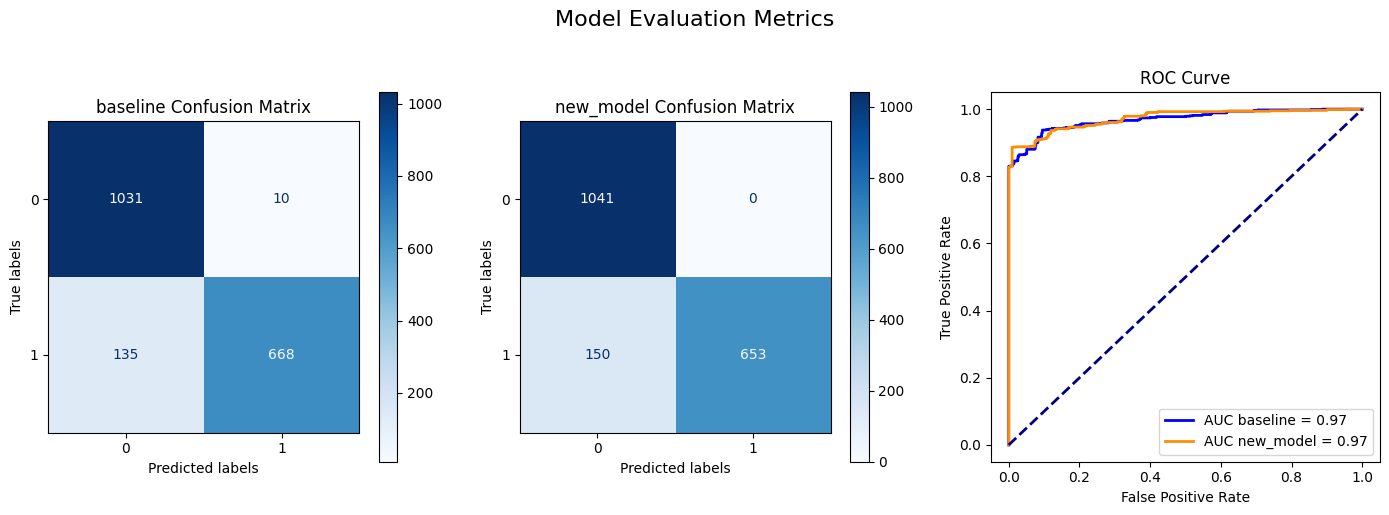

In [26]:
eval.plot_metrics()

In [ ]:
from lgbm_full_model import FullLgbmPipeline

In [ ]:
model_config = {
    'target_column': 'anomaly',
    'look_back': 10,
    'num_splits': 2,
}

In [ ]:
full_model = FullLgbmPipeline(model_config)

In [ ]:
preds = full_model.run()

In [ ]:
preds

In [ ]:
full_model.y_test

In [ ]:
model_config = {
    'target_column': 'anomaly',
    'look_back': 10,
    'num_splits': 2,
    'th': 0.35,
}

In [ ]:
from evaluation import ModelSelector

In [ ]:
selector = ModelSelector(model_config,FullLgbmPipeline,min_splits=7,max_splits=10)

In [ ]:
res = selector.run_model_permutations()

In [ ]:
res[0]

In [ ]:
table = res[0].T.sort_values(by=['f1','mar']) #.style.background_gradient(axis=0)

In [ ]:
table

In [ ]:
table[table['f1']>0.89].tail(1)

In [ ]:
selector.select_best(f1_th=0.89)

In [ ]:
res[1]